In [89]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [90]:
from iqradre.prod.idcard import IDCardPredictor
import matplotlib.pyplot as plt

import pandas as pd
pd.set_option("max_rows", None)
import imutils

In [91]:
%%time
config = {
    'segmentor': f'../weights/segment/unet_sfeat32_v5.pth',
    'detector': f'../weights/detect/craft_ktp_ohem.pth.tar',
    'recognitor': f'../weights/recog/ocrnet_pretrained_ktp_v4.pth',
    'extractor': f'../weights/extract/layoutlm_v2_ktp_20kv1_vacc_0.981_vloss_0.26.pth',
    'tokenizer': "indobenchmark/indobert-base-p2"   
}

idcard = IDCardPredictor(config, device='cpu')

INFO: Load all model, please wait...


Some weights of the model checkpoint at microsoft/layoutlm-base-uncased were not used when initializing LayoutLMForTokenClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing LayoutLMForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing LayoutLMForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of LayoutLMForTokenClassification were not initialized from the model checkpoint at microsoft

INFO: All model has been loaded!
CPU times: user 5.06 s, sys: 383 ms, total: 5.45 s
Wall time: 10.1 s


(1026, 651)
CPU times: user 13.1 s, sys: 197 ms, total: 13.3 s
Wall time: 2.27 s


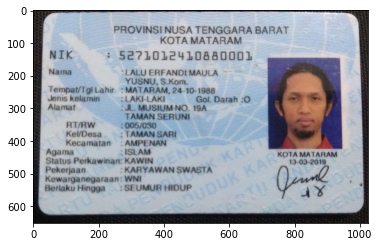

In [150]:
%%time
# impath = 'images/ktp_aan/ktp4.jpg'
impath = 'images/fandi_ktp/ktp2.jpg'
# impath = '/data/idcard/combined/sampled/14907_image.jpg'
pred_data = idcard.predict(impath)

In [151]:
pred_data.keys()

dict_keys(['prediction', 'dataframe', 'image', 'segment_image', 'rotated_image', 'images_patch', 'boxes', 'texts', 'score_text', 'score_list', 'score'])

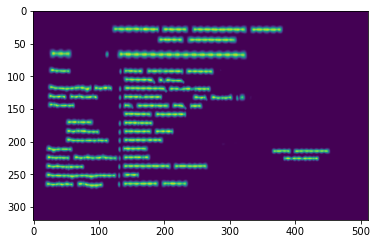

In [152]:
plt.imshow(pred_data['score']);plt.show()

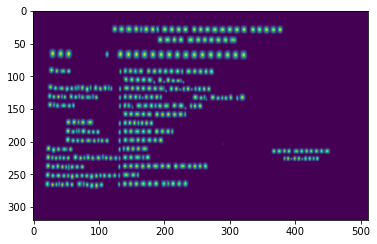

In [153]:
plt.imshow(pred_data['score_text']);plt.show()

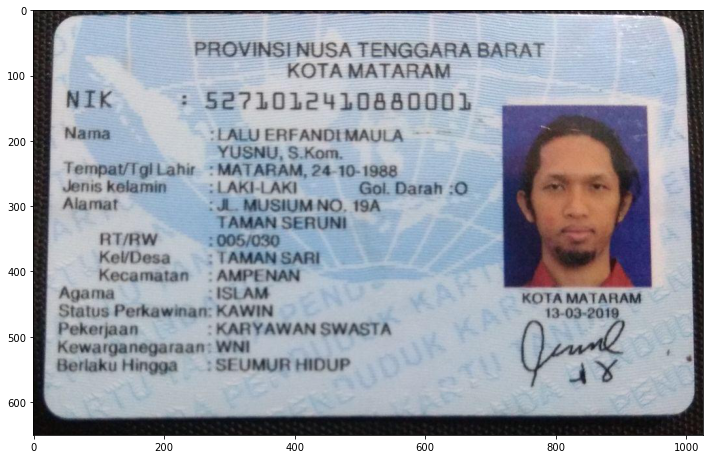

In [154]:
plt.figure(figsize=(12,12))
plt.imshow(pred_data['segment_image']);plt.show()

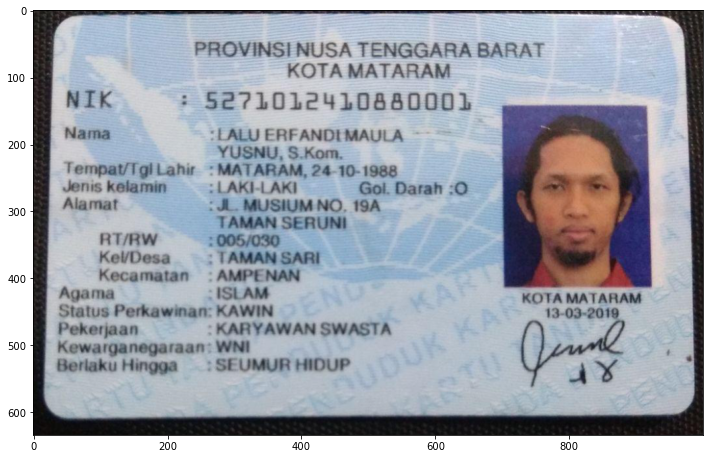

In [155]:
plt.figure(figsize=(12,12))
plt.imshow(pred_data['rotated_image']);plt.show()

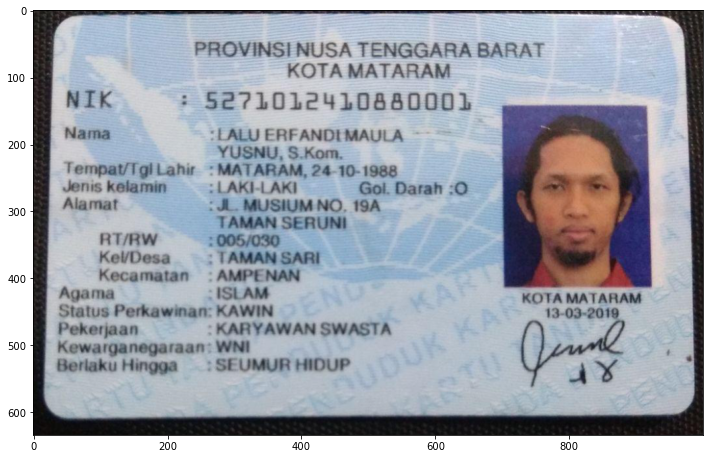

In [156]:
plt.figure(figsize=(12,12))
plt.imshow(pred_data['image']);plt.show()

In [157]:
pred_data['prediction']

{'provinsi': 'PROVINSI NUSA TENGGARA BARAT',
 'kabupaten': 'KOTA MATARAM',
 'nik': '5271012410880001',
 'nama': '5, 35 LALU ERFANDU S.KOm, MAULA',
 'ttl': 'B YUSNU, MATARAM, 24-10-1988',
 'gender': 'LAKI-LAKI',
 'goldar': '',
 'alamat': 'G. S. JL. TAMAN MUSIUM SERUNI NO. 19A GI Q. 25-01-2010 G. S. G.',
 'rtrw': '005/030',
 'kelurahan': 'I. II TAMAN SARI,',
 'kecamatan': 'AMPENAN',
 'agama': 'ISLAM',
 'perkawinan': 'KAWIN',
 'pekerjaan': 'KARYAWAN SWASTA 1',
 'kewarganegaraan': 'WNI',
 'berlaku': 'SEUMUR HIDUP',
 'sign_place': 'KOTA MATARAM',
 'sign_date': '13-03-2019'}

In [158]:
pred_data['dataframe']

,words,bboxes,tokens,labels,gseq,wseq
0,PROVINSI,"[238.0, 43.0, 390.0, 73.0]",provinsi,U-FLD_PROV,0,0
1,TENGGARA,"[482.0, 43.0, 658.0, 73.0]",tenggara,I-VAL_PROV,1,0
2,NUSA,"[390.0, 44.0, 478.0, 74.0]",nusa,B-VAL_PROV,2,0
3,BARAT,"[660.0, 44.0, 766.0, 74.0]",barat,L-VAL_PROV,3,0
4,KOTA,"[377.0, 75.0, 463.0, 103.0]",kota,U-FLD_KAB,4,0
5,MATARAM,"[468.0, 76.0, 626.0, 106.0]",mataram,U-VAL_KAB,5,0
6,NIK,"[46.0, 114.0, 122.0, 150.0]",nik,U-FLD_NIK,6,0
7,5271012410880001,"[252.0, 115.0, 655.0, 154.0]",52,B-VAL_NIK,7,0
8,5271012410880001,"[252.0, 115.0, 655.0, 154.0]",##71,I-VAL_NIK,7,1
9,5271012410880001,"[252.0, 115.0, 655.0, 154.0]",##012,I-VAL_NIK,7,2


In [159]:
pred_data['texts']

['PROVINSI',
 'NUSA',
 'TENGGARA',
 'BARAT',
 'KOTA',
 'MATARAM',
 'NIK',
 '5271012410880001',
 '5,',
 'Nama',
 'LALU',
 'ERFANDU',
 'MAULA',
 '35',
 'YUSNU,',
 'S.KOm,',
 'Tempat/Tgl',
 'Lahir',
 'MATARAM,',
 'B',
 '24-10-1988',
 'Jenis',
 'Kelamin',
 'LAKI-LAKI',
 'Gol.',
 'Darah',
 'Q.',
 'G.',
 'GI',
 'Alamat',
 'JL.',
 'MUSIUM',
 'NO.',
 'S.',
 '19A',
 'TAMAN',
 'SERUNI',
 'RT/RW',
 '005/030',
 'I.',
 'Kel/Desa',
 'TAMAN',
 'SARI,',
 'II',
 'Kecamatan',
 'AMPENAN',
 '25-01-2010',
 'Agama',
 'ISLAM',
 'S.',
 'KOTA',
 'MATARAM',
 'Status',
 'Perkawinan',
 'KAWIN',
 'G.',
 '13-03-2019',
 'Pekerjaan',
 'KARYAWAN',
 'SWASTA',
 'G.',
 'Kewarganegaraan',
 'WNI',
 '1',
 'SEUMUR',
 'HIDUP',
 'Berlaku',
 'Hingga',
 'Status']

In [160]:
impatch = pred_data['images_patch']
texts = pred_data['texts']

PROVINSI


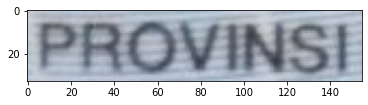

NUSA


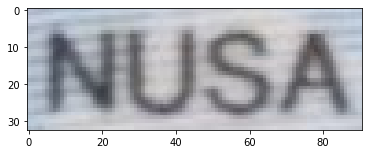

TENGGARA


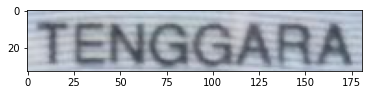

BARAT


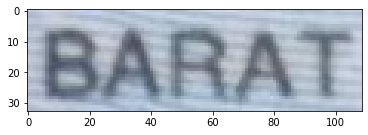

KOTA


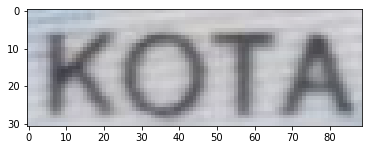

MATARAM


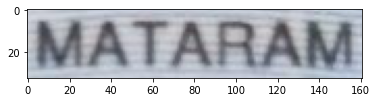

NIK


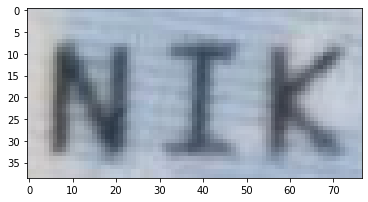

5271012410880001


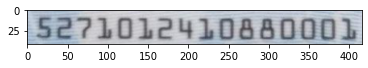

5,


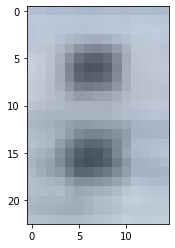

Nama


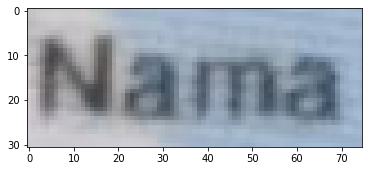

LALU


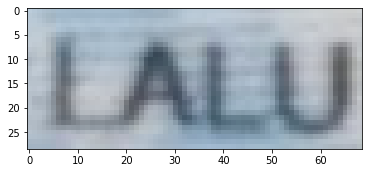

ERFANDU


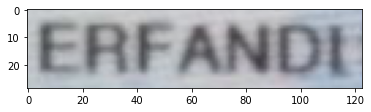

MAULA


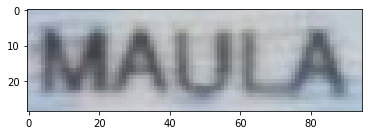

35


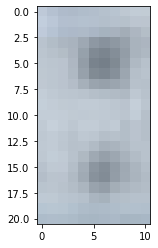

YUSNU,


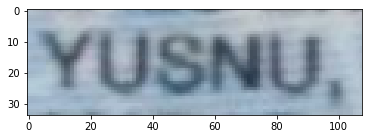

S.KOm,


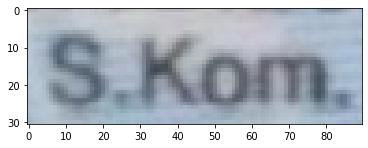

Tempat/Tgl


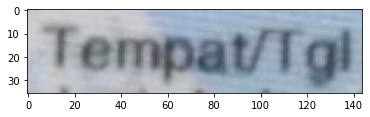

Lahir


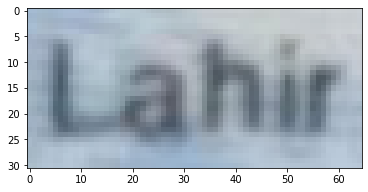

MATARAM,


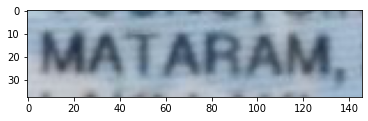

B


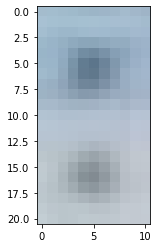

24-10-1988


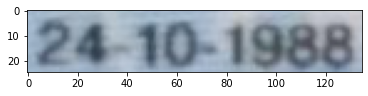

Jenis


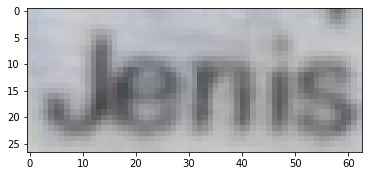

Kelamin


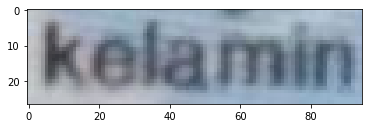

LAKI-LAKI


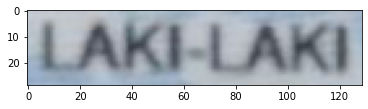

Gol.


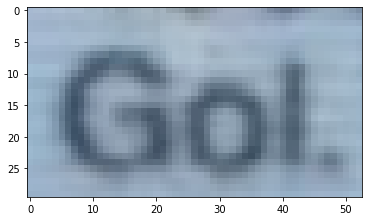

Darah


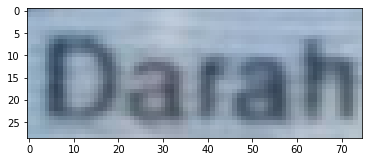

Q.


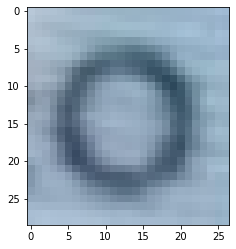

G.


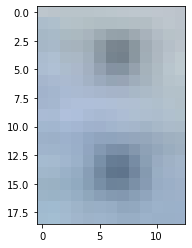

GI


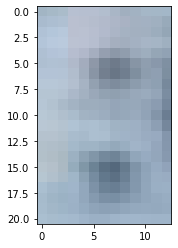

Alamat


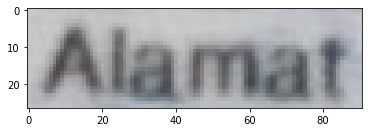

JL.


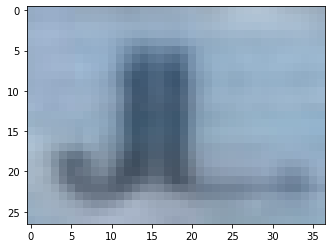

MUSIUM


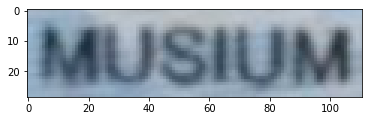

NO.


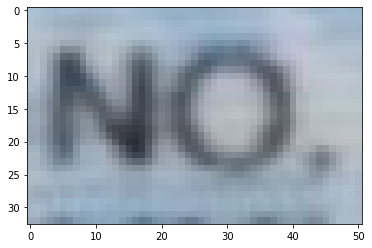

S.


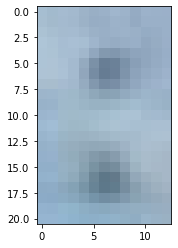

19A


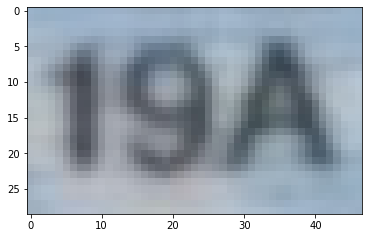

TAMAN


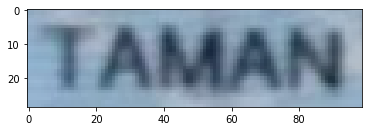

SERUNI


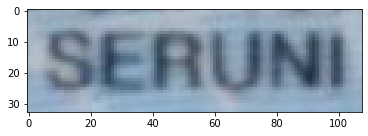

RT/RW


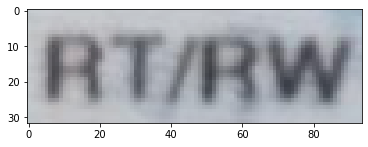

005/030


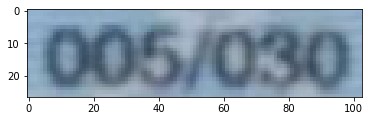

I.


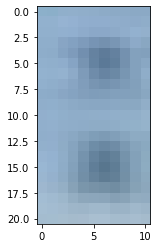

Kel/Desa


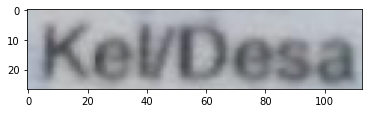

TAMAN


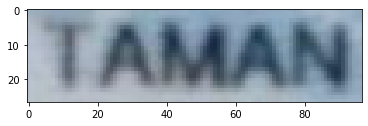

SARI,


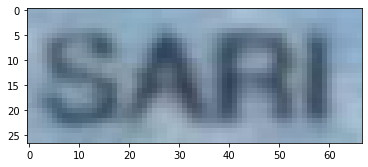

II


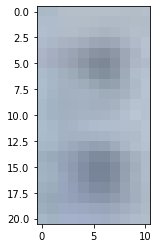

Kecamatan


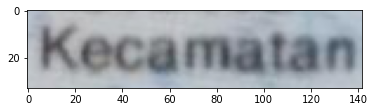

AMPENAN


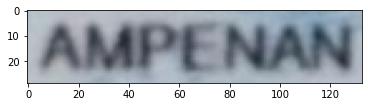

25-01-2010


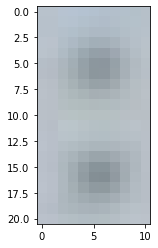

Agama


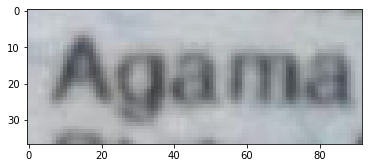

ISLAM


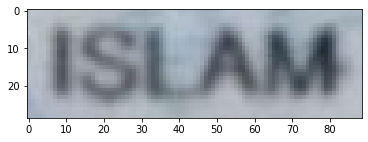

S.


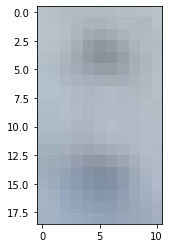

KOTA


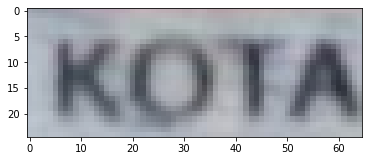

MATARAM


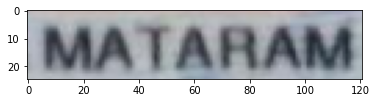

Status


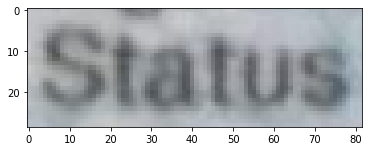

Perkawinan


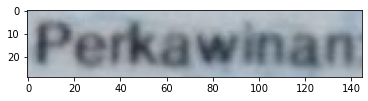

KAWIN


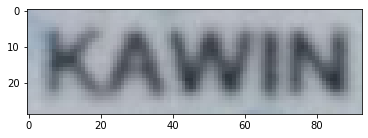

G.


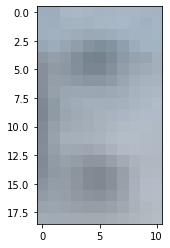

13-03-2019


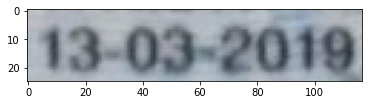

Pekerjaan


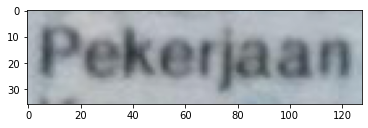

KARYAWAN


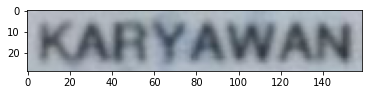

SWASTA


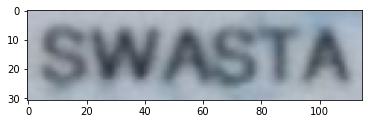

G.


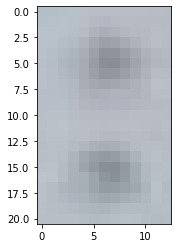

Kewarganegaraan


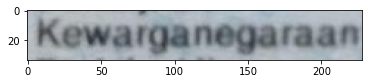

WNI


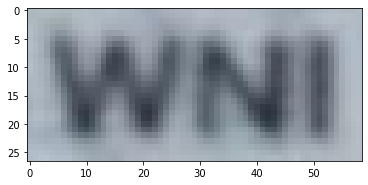

1


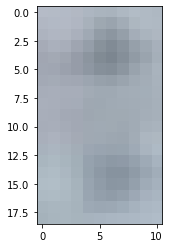

SEUMUR


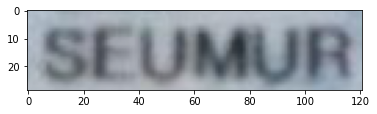

HIDUP


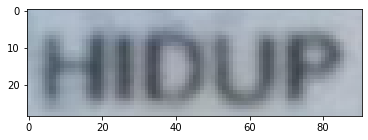

Berlaku


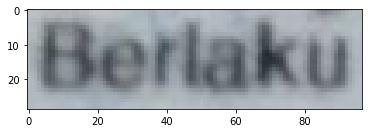

Hingga


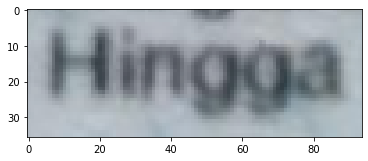

Status


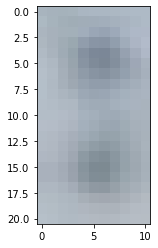

In [161]:
for idx, (patch, txt) in enumerate(zip(impatch, texts)):
    print(txt)    
    plt.imshow(patch);plt.show()
